# Happiness Analysis

## Required Imports

In [51]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Preprocessing (Downloading and Cleaning Data)

In [52]:
# read csv files into data frames
df = pd.read_csv("data/world-happiness-report.csv")
df2021 = pd.read_csv("data/world-happiness-report-2021.csv")

In [53]:
# examine names of columns for 2008-2020 data frame
list(df.columns)

['Country name',
 'year',
 'Life Ladder',
 'Log GDP per capita',
 'Social support',
 'Healthy life expectancy at birth',
 'Freedom to make life choices',
 'Generosity',
 'Perceptions of corruption',
 'Positive affect',
 'Negative affect']

In [54]:
# examine names of columns for 2021 data frame
list(df2021.columns)

['Country name',
 'Regional indicator',
 'Ladder score',
 'Standard error of ladder score',
 'upperwhisker',
 'lowerwhisker',
 'Logged GDP per capita',
 'Social support',
 'Healthy life expectancy',
 'Freedom to make life choices',
 'Generosity',
 'Perceptions of corruption',
 'Ladder score in Dystopia',
 'Explained by: Log GDP per capita',
 'Explained by: Social support',
 'Explained by: Healthy life expectancy',
 'Explained by: Freedom to make life choices',
 'Explained by: Generosity',
 'Explained by: Perceptions of corruption',
 'Dystopia + residual']

In [55]:
# add column for year on 2021 data frame
df2021['Year'] = 2021

In [56]:
# drop columns whose data will not be analyzed
df2021 = df2021.drop(columns=['Standard error of ladder score','upperwhisker', 'lowerwhisker',
       'Ladder score in Dystopia',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual'], axis=1)
df = df.drop(columns=['Positive affect','Negative affect'], axis=1)

In [57]:
# rename columns
df2021 = df2021.rename(columns = {'Logged GDP per capita':'Log GDP per capita'} )
df = df.rename(columns= {'year':'Year', 'Life Ladder':'Ladder score', 'Healthy life expectancy at birth' : 'Healthy life expectancy'})

In [58]:
# add column for regional indicator on 2005-2020 data frame
df_with_regions = pd.merge(df, df2021[['Country name','Regional indicator']], on = ['Country name'])

In [59]:
# combine data sets to create one data frame for 2005-2021
df_all = pd.concat([df_with_regions, df2021], ignore_index=True).sort_values(by="Country name", ascending=True)
years_list = list(df_all["Year"].unique())
sorted(years_list)

[2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 2021]

In [60]:
# add column for time in terms of COVID
def covid_time(row):
    if row["Year"] < 2020: #distinguishing between pre-covid and post-covid could be improved if we had data by month and if we had data in future
        return "Pre-COVID"  #assuming that the pre-covid is before 2020
    else:
        return "Post-COVID" #assuming that the post-covid is 2020 & 2021

df_all["COVID time"] = df_all.apply(covid_time, axis=1)

In [61]:
# reorder columns
df_all = df_all[['Country name',
                 'Regional indicator',
                 'Year',
                 'COVID time',
                 'Ladder score',
                 'Log GDP per capita',
                 'Healthy life expectancy',
                 'Social support',
                 'Freedom to make life choices',
                 'Generosity',
                 'Perceptions of corruption']]

In [62]:
# confirm that data frame has the necessary columns in the intended order
list(df_all.columns)

['Country name',
 'Regional indicator',
 'Year',
 'COVID time',
 'Ladder score',
 'Log GDP per capita',
 'Healthy life expectancy',
 'Social support',
 'Freedom to make life choices',
 'Generosity',
 'Perceptions of corruption']

In [63]:
# observe the head and tail of the processed data frame
df_all

,Country name,Regional indicator,Year,COVID time,Ladder score,Log GDP per capita,Healthy life expectancy,Social support,Freedom to make life choices,Generosity,Perceptions of corruption
0,Afghanistan,South Asia,2008,Pre-COVID,3.724,7.370,50.800,0.451,0.718,0.168,0.882
11,Afghanistan,South Asia,2019,Pre-COVID,2.375,7.697,52.400,0.420,0.394,-0.108,0.924
10,Afghanistan,South Asia,2018,Pre-COVID,2.694,7.692,52.600,0.508,0.374,-0.094,0.928
9,Afghanistan,South Asia,2017,Pre-COVID,2.662,7.697,52.800,0.491,0.427,-0.121,0.954
8,Afghanistan,South Asia,2016,Pre-COVID,4.220,7.697,53.000,0.559,0.523,0.042,0.793
...,...,...,...,...,...,...,...,...,...,...,...
1873,Zimbabwe,Sub-Saharan Africa,2008,Pre-COVID,3.174,7.461,44.140,0.843,0.344,-0.090,0.964
1871,Zimbabwe,Sub-Saharan Africa,2006,Pre-COVID,3.826,7.711,41.580,0.822,0.431,-0.076,0.905
2033,Zimbabwe,Sub-Saharan Africa,2021,Post-COVID,3.145,7.943,56.201,0.750,0.677,-0.047,0.821
1877,Zimbabwe,Sub-Saharan Africa,2012,Pre-COVID,4.955,7.983,49.540,0.896,0.470,-0.103,0.859


In [64]:
# check for missing values
df_all.isna().sum()

Country name                      0
Regional indicator                0
Year                              0
COVID time                        0
Ladder score                      0
Log GDP per capita               24
Healthy life expectancy          51
Social support                    9
Freedom to make life choices     30
Generosity                       76
Perceptions of corruption       104
dtype: int64

# Sort Countries by Average Ladder Score (2005-2021)

In [65]:
df_all_ladder = df_all.groupby(['Country name', 'Regional indicator'])['Ladder score'].mean().sort_values(ascending=False)
print("top 15:\n", df_all_ladder.head(15))
print("\nbottom 15:\n", df_all_ladder.tail(15))

top 15:
 Country name   Regional indicator          
Denmark        Western Europe                  7.676625
Finland        Western Europe                  7.614643
Switzerland    Western Europe                  7.550364
Norway         Western Europe                  7.501455
Netherlands    Western Europe                  7.466133
Iceland        Western Europe                  7.458444
Sweden         Western Europe                  7.369063
Canada         North America and ANZ           7.359250
New Zealand    North America and ANZ           7.308067
Australia      North America and ANZ           7.275467
Austria        Western Europe                  7.244071
Israel         Middle East and North Africa    7.214562
Costa Rica     Latin America and Caribbean     7.172000
United States  North America and ANZ           7.081500
Luxembourg     Western Europe                  7.070250
Name: Ladder score, dtype: float64

bottom 15:
 Country name  Regional indicator          
Sierra Leone  Su

# Average Ladder Score by Region (2021)

Text(0.5, 1.0, 'Average Ladder Score by Region (2021)')

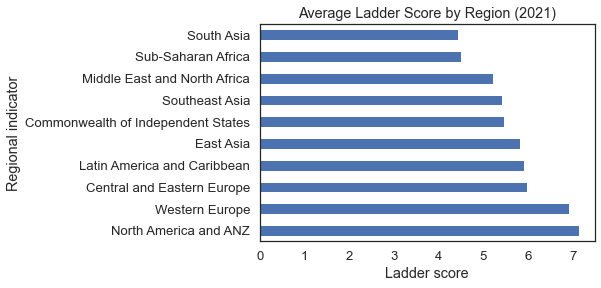

In [66]:
df2021.groupby('Regional indicator')['Ladder score'].mean().sort_values(ascending=False).plot.barh()

plt.xlabel("Ladder score")
plt.title("Average Ladder Score by Region (2021)")

# Pre-COVID vs. Post-COVID

Text(0.5, 1.0, 'Average Ladder Score by Region (Pre-COVID vs. Post-COVID)')

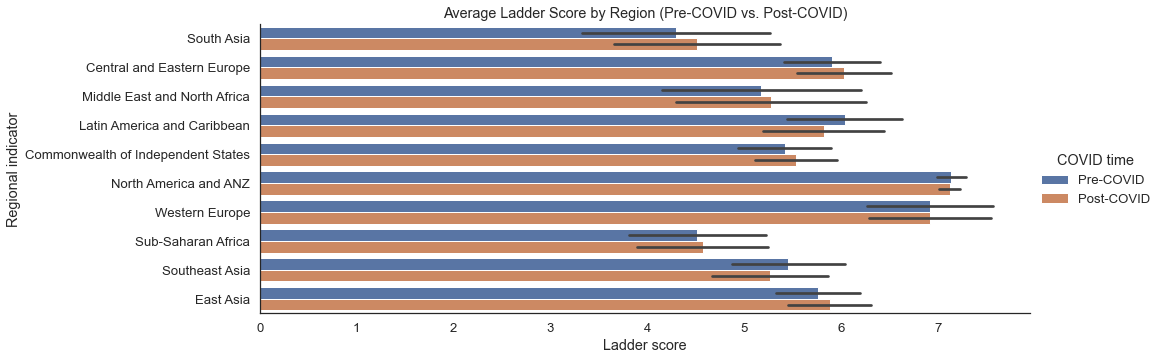

In [67]:
sns.set(style="white", font_scale=1.2)
covid_plot = sns.catplot(x="Ladder score", y="Regional indicator", hue="COVID time", data=df_all[df_all['Year'] >= 2018], kind="bar", height=5, aspect=3, ci="sd")

plt.title("Average Ladder Score by Region (Pre-COVID vs. Post-COVID)")

# Correlation Between Features and Ladder Score

Text(0.5, 1.0, 'Correlation to Ladder Score')

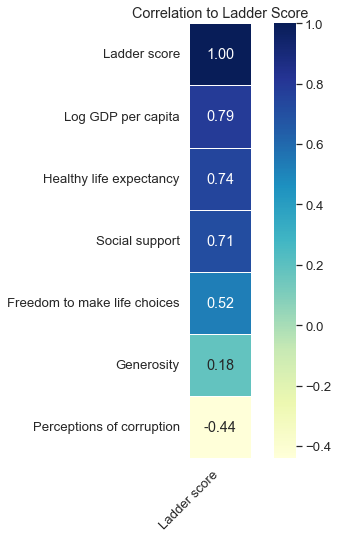

In [68]:
corr_matrix = df_all.drop("Year", axis =1).corr()

f,ax=plt.subplots(figsize=(8,8))
corr_ladder = sns.heatmap(corr_matrix.loc[:, ["Ladder score"]], annot=True, linewidth=.5,fmt='.2f',ax=ax, square=True, cmap='YlGnBu')
corr_ladder.set_xticklabels(corr_ladder.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title("Correlation to Ladder Score")

Text(0.5, 1.0, 'Heat Map')

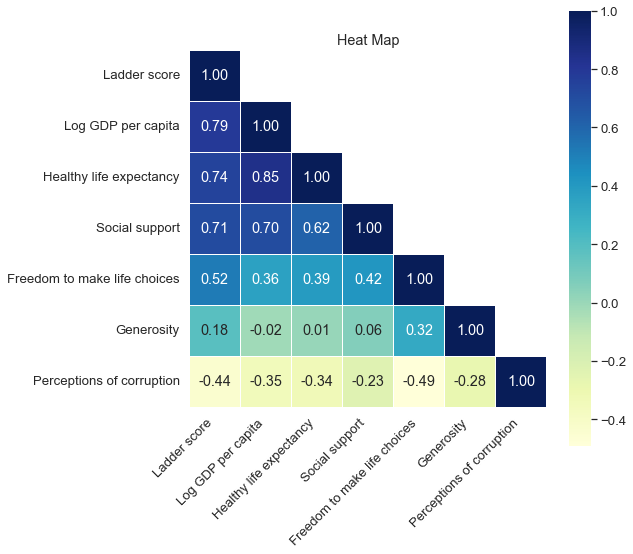

In [69]:
corr_matrix_tri = corr_matrix.where(np.tril(np.ones(corr_matrix.shape)).astype(bool))

f,ax=plt.subplots(figsize=(8,8))
hmap = sns.heatmap(corr_matrix_tri, annot=True, linewidth=.5,fmt='.2f',ax=ax, square=True, cmap='YlGnBu')
hmap.set_xticklabels(hmap.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title("Heat Map")

# Multiple Linear Regression


In [70]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

start = df_all.groupby('Country name').mean()
to_plot = start.copy().reset_index().drop("Year", axis=1)

feature_list = ["Log GDP per capita", "Healthy life expectancy", "Social support",
                "Freedom to make life choices", "Generosity", "Perceptions of corruption"]

y = to_plot["Ladder score"]

X = to_plot[["Log GDP per capita", "Healthy life expectancy", "Social support",
                "Freedom to make life choices", "Generosity", "Perceptions of corruption"]]

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## Results on Training Data

In [72]:
y_train_pred = model.predict(X_train)

mse = mean_squared_error(y_true=y_train, y_pred=y_train_pred)
mae = mean_absolute_error(y_true=y_train, y_pred=y_train_pred)
r2 = r2_score(y_true=y_train, y_pred=y_train_pred)
print(("mean squared error: {}\nmean absolute error: {}\nr^2: {}")
      .format(mse, mae, r2))

mean squared error: 0.19362621334894986
mean absolute error: 0.3405474851928523
r^2: 0.8172912413028857


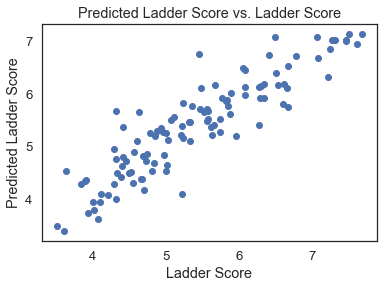

In [73]:
plt.scatter(y_train, y_train_pred)
plt.xlabel("Ladder Score")
plt.ylabel("Predicted Ladder Score")
plt.title("Predicted Ladder Score vs. Ladder Score")
plt.show()

## Results on Test Data

In [74]:
y_test_pred = model.predict(X_test)

mse = mean_squared_error(y_true=y_test, y_pred=y_test_pred)
mae = mean_absolute_error(y_true=y_test, y_pred=y_test_pred)
r2 = r2_score(y_true=y_test, y_pred=y_test_pred)
print(("mean squared error: {}\nmean absolute error: {}\nr^2: {}")
      .format(mse, mae, r2))

mean squared error: 0.21497828434917335
mean absolute error: 0.34357342603591307
r^2: 0.8187119942787473


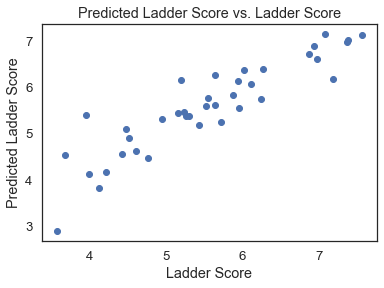

In [75]:
plt.scatter(y_test, y_test_pred)
plt.xlabel("Ladder Score")
plt.ylabel("Predicted Ladder Score")
plt.title("Predicted Ladder Score vs. Ladder Score")
plt.show()

# Random Forest Regressor

In [76]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10)

## Results on Training Data

In [77]:
y_train_pred = model.predict(X_train)

mse = mean_squared_error(y_true=y_train, y_pred=y_train_pred)
mae = mean_absolute_error(y_true=y_train, y_pred=y_train_pred)
r2 = r2_score(y_true=y_train, y_pred=y_train_pred)
print(("mean squared error: {}\nmean absolute error: {}\nr^2: {}")
      .format(mse, mae, r2))

mean squared error: 0.04274807806054801
mean absolute error: 0.1494656818656818
r^2: 0.9596622371318381


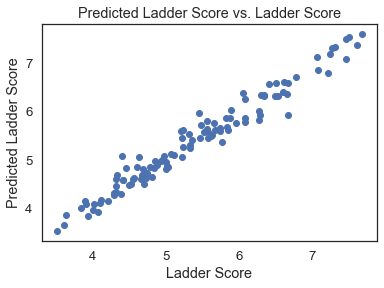

In [78]:
plt.scatter(y_train, y_train_pred)
plt.xlabel("Ladder Score")
plt.ylabel("Predicted Ladder Score")
plt.title("Predicted Ladder Score vs. Ladder Score")
plt.show()

## Results on Test Data

In [79]:
y_test_pred = model.predict(X_test)

mse = mean_squared_error(y_true=y_test, y_pred=y_test_pred)
mae = mean_absolute_error(y_true=y_test, y_pred=y_test_pred)
r2 = r2_score(y_true=y_test, y_pred=y_test_pred)
print(("mean squared error: {}\nmean absolute error: {}\nr^2: {}")
      .format(mse, mae, r2))

mean squared error: 0.23732582837858715
mean absolute error: 0.35972257510398964
r^2: 0.7998666411207511


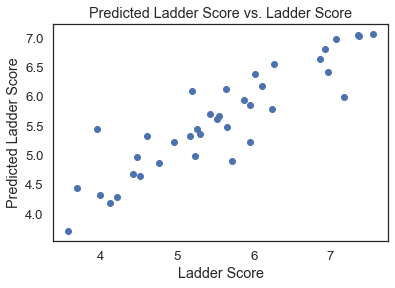

In [80]:
plt.scatter(y_test, y_test_pred)
plt.xlabel("Ladder Score")
plt.ylabel("Predicted Ladder Score")
plt.title("Predicted Ladder Score vs. Ladder Score")
plt.show()

## Feature Importances

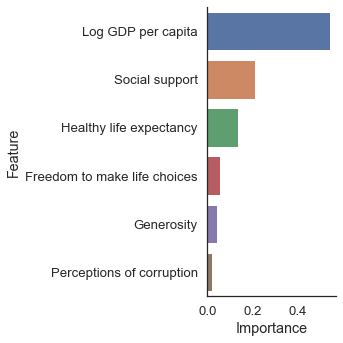

In [81]:
importances = pd.DataFrame([X.columns, model.feature_importances_]).T
importances.rename(columns={0: 'Feature', 1: 'Importance'}, inplace=True)
importances_graph = sns.catplot(data=importances.sort_values(by="Importance", ascending=False), x="Importance", y="Feature", kind="bar")